In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score 
from sklearn import metrics

In [27]:
df = pd.read_excel("kapha (1).xlsx")

In [28]:
df.iloc[:,30].unique()

array([0, 1], dtype=int64)

In [29]:
df.shape

(50000, 31)

In [30]:
# 215 247 211 70 50 19 0 188

In [31]:
X = df.drop([30], axis =1)
y = df.iloc[:,30]

In [32]:
print(X.shape)

print(y.shape)

(50000, 30)
(50000,)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [34]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    # tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
                                    tf.keras.layers.Dense(40, activation=tf.keras.activations.relu),
                                    tf.keras.layers.Dense(2, activation=tf.keras.activations.softmax)])

In [35]:
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [36]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
# print('Neural Network Model Summary: ')
# print(model.summary())

In [38]:
history = model.fit(X_train, y_train, epochs=10)
# , batch_size=16, validation_data=(X_test, y_test),callbacks = [early_stop]

Epoch 1/10
1407/1407 [==============================] - 3s 2ms/step - loss: 0.1851 - accuracy: 0.9249
Epoch 2/10
1407/1407 [==============================] - 3s 2ms/step - loss: 0.0327 - accuracy: 0.9999
Epoch 3/10
1407/1407 [==============================] - 3s 2ms/step - loss: 0.0072 - accuracy: 1.0000
Epoch 4/10
1407/1407 [==============================] - 3s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 5/10
1407/1407 [==============================] - 3s 2ms/step - loss: 7.5794e-04 - accuracy: 1.0000
Epoch 6/10
1407/1407 [==============================] - 3s 2ms/step - loss: 3.0084e-04 - accuracy: 1.0000
Epoch 7/10
1407/1407 [==============================] - 2s 2ms/step - loss: 1.2624e-04 - accuracy: 1.0000
Epoch 8/10
1407/1407 [==============================] - 3s 2ms/step - loss: 5.4860e-05 - accuracy: 1.0000
Epoch 9/10
1407/1407 [==============================] - 3s 2ms/step - loss: 2.4305e-05 - accuracy: 1.0000
Epoch 10/10
1407/1407 [==============================] - 3s 2m

In [39]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model accuracy on test data: {accuracy * 100:.2f}%')

157/157 [==============================] - 1s 2ms/step - loss: 6.9829e-06 - accuracy: 1.0000
Model accuracy on test data: 100.00%


In [40]:
predictions = model.predict(X_test)

157/157 [==============================] - 0s 2ms/step


In [41]:
predictions.shape

(5000, 2)

In [42]:
predictions[0]

array([9.9999994e-01, 4.1647034e-19], dtype=float32)

In [43]:
pred = np.zeros(5000)

In [44]:
for i in range(5000):
    pred[i] = np.argmax(predictions[i])

In [45]:
pred

array([0., 0., 1., ..., 1., 1., 0.])

In [46]:
pred.shape

(5000,)

In [47]:
y_test.shape

(5000,)

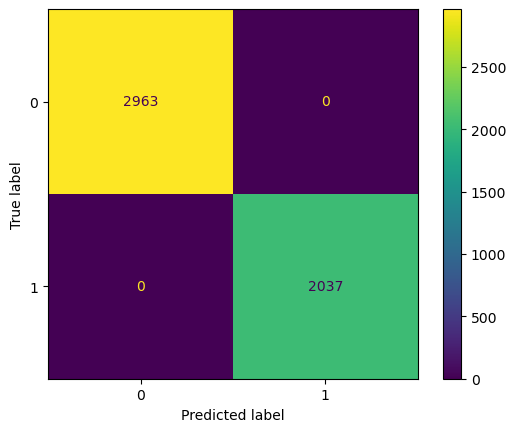

In [48]:
confusion_matrix = confusion_matrix(y_test, pred)
# print(classification_report(y_test, pred))


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

In [49]:
print(accuracy_score(y_test, pred))

1.0


In [50]:
model.save("kapha_model.keras")